## Limpeza e Tratamento de Dados

In [1]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import statistics as sts
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Leitura do arquivo
df = pd.read_csv("../dados/Churn.csv", sep=";")

# Visualizar o dataset
df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
# Verificar o tamanho do dataset
print(f'O arquivo tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

O arquivo tem 999 linhas e 12 colunas.


In [4]:
# Renomear as colunas
df.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito",
                    "Ativo", "Salario", "Saiu"]
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
# Verificar quantidade e tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [6]:
# Resumo estatístico das colunas numéricas
df.describe()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.920000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.305800e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.029011e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.405213e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


In [7]:
# Verificar se existem dados nulos ou ausentes
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [8]:
# Analisar a coluna 'Gênero'
agrupado_genero = df.groupby(['Genero']).size()
agrupado_genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [9]:
# Padronizar de acordo com o dominio
df.loc[df['Genero'] ==  'M', 'Genero'] = "Masculino"
df.loc[df['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
agrupado_genero = df.groupby(['Genero']).size()
agrupado_genero

Genero
Feminino     464
Masculino    527
dtype: int64

In [10]:
# Preencher valores NaN com Masculino (moda, ou seja, o que mais aparece)
df['Genero'].fillna('Masculino', inplace=True)
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [11]:
# Analisar a coluna 'Salário'
df['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [12]:
# Mediana da coluna 'Salário'
mediana_salario = sts.median(df['Salario'])
mediana_salario

70518.0

In [13]:
# Preencher valores NaN com a mediana
df['Salario'].fillna(mediana_salario, inplace=True)
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [14]:
# Verificar intervalo de salários
df['Salario'].describe()

count    9.990000e+02
mean     3.504085e+07
std      5.287241e+08
min      9.677000e+03
25%      2.856485e+06
50%      8.641028e+06
75%      1.402954e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [15]:
# Calcular desvio padrão da coluna 'Salário'
desv = sts.stdev(df['Salario'])
desv

528724131.43461967

In [16]:
# Considerando 2 desvios padrão, vamos chegar se algum atende o critério
df.loc[df['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [17]:
# Utilizando ainda a mediana dos salários, substituímos os registros que são outliers (considerando 2 desvios padrão)
df.loc[df['Salario'] >=  2 * desv, 'Salario'] = mediana_salario

In [18]:
# Considerando 2 desvios padrão, vamos chegar novamente se algum atende o critério
df.loc[df['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [19]:
# Checar novamente os valores nulos
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [20]:
# Analisar a coluna 'Salário'
agrupado_estado = df.groupby(['Estado']).size()
agrupado_estado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [21]:
# Padronizar de acordo com o dominio
df.loc[df['Estado'].isin( ['SP','TD', 'RP']), 'Estado'] = "RS"
agrupado_estado = df.groupby(['Estado']).size()
agrupado_estado

Estado
PR    257
RS    484
SC    258
dtype: int64

In [22]:
# Analisar a coluna 'Idade'
df['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [23]:
# Verificar idades fora do domínio (entre 0 e 100)
df.loc[(df['Idade'] <  0 )  | (df['Idade'] >  100) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [24]:
# Mediana da coluna 'Idade'
mediana_idade = sts.median(df['Idade'])
mediana_idade

37

In [25]:
# Substituir os valores fora do domínio de idade pela mediana
df.loc[(df['Idade'] <  0 )  | (df['Idade'] >  100), 'Idade'] = mediana_idade
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [26]:
# Verificar idades fora do domínio (entre 0 e 100) novamente
df.loc[(df['Idade'] <  0 )  | ( df['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [27]:
# Visualizar dataset
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [28]:
# Verificar dados duplicados
df.duplicated().sum()

1

In [29]:
# Buscar os dados duplicados pela coluna 'Id'
df[df.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [30]:
# Excluir registro duplicado pela coluna 'Id'
df.drop_duplicates(subset="Id",keep='first', inplace=True) 

In [31]:
# Verificar se os dados duplicados foram excluídos pela coluna 'Id'
df[df.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [32]:
# Visualizar o dataset
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [33]:
# Tamanho do dataset
df.shape

(998, 12)

In [34]:
# Realizando novamente as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              998 non-null    int64  
 1   Score           998 non-null    int64  
 2   Estado          998 non-null    object 
 3   Genero          998 non-null    object 
 4   Idade           998 non-null    int64  
 5   Patrimonio      998 non-null    int64  
 6   Saldo           998 non-null    int64  
 7   Produtos        998 non-null    int64  
 8   TemCartCredito  998 non-null    int64  
 9   Ativo           998 non-null    int64  
 10  Salario         998 non-null    float64
 11  Saiu            998 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 101.4+ KB


In [35]:
# Resumo estatístico
df.describe()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
count,998.000000,998.000000,998.000000,998.000000,9.980000e+02,998.000000,998.000000,998.00000,9.980000e+02,998.000000
mean,501.337675,648.605210,38.908818,5.073146,7.162423e+06,1.526052,0.703407,0.51002,8.747942e+06,0.203407
std,288.500953,98.312117,10.676642,2.926320,6.314508e+06,0.574293,0.456985,0.50015,6.091147e+06,0.402734
min,1.000000,376.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,252.250000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,2.777452e+06,0.000000
50%,501.500000,653.000000,37.000000,5.000000,8.926348e+06,1.000000,1.000000,1.00000,8.566258e+06,0.000000
75%,750.750000,721.000000,44.000000,8.000000,1.258767e+07,2.000000,1.000000,1.00000,1.391447e+07,0.000000
max,1000.000000,850.000000,82.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.997254e+07,1.000000


In [36]:
# Verificar dados ausentes ou nulos
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [37]:
# Verificar dados duplicados
df.duplicated().sum()

0

<Axes: xlabel='Genero'>

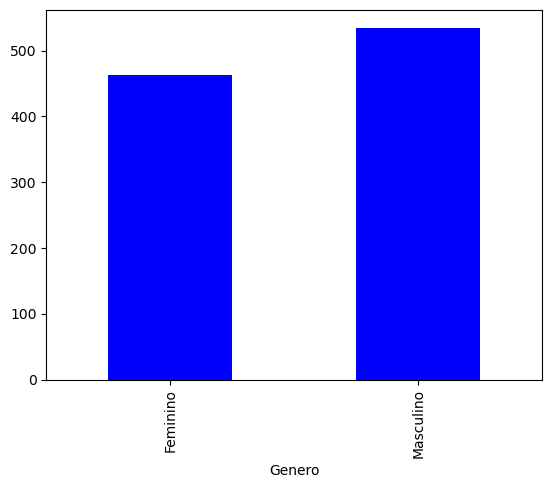

In [38]:
analise_genero = df.groupby(['Genero']).size()
analise_genero.plot.bar(color = 'blue')

<Axes: xlabel='Estado'>

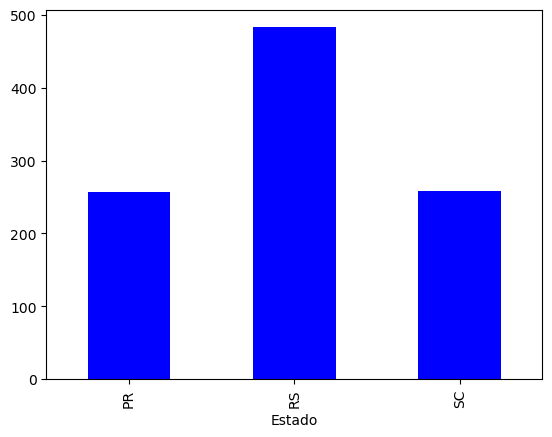

In [39]:
analise_estado = df.groupby(['Estado']).size()
analise_estado.plot.bar(color = 'blue')

Text(0.5, 1.0, 'Score')

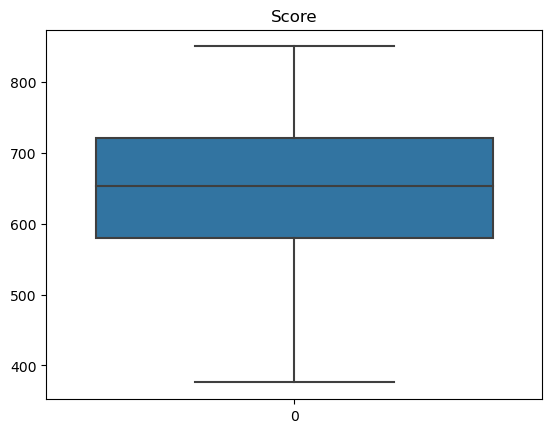

In [40]:
sns.boxplot(df['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

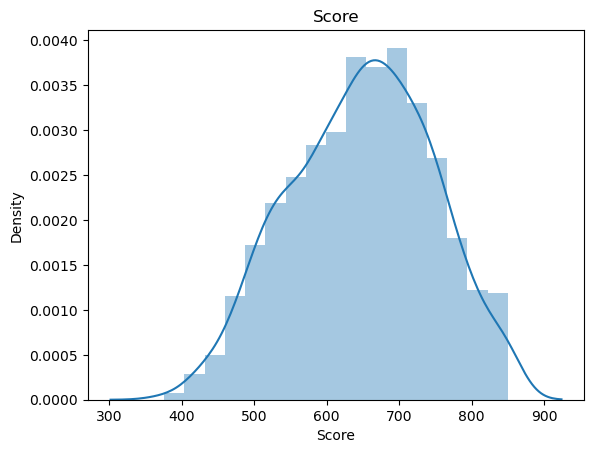

In [41]:
sns.distplot(df['Score']).set_title('Score')

Text(0.5, 1.0, 'Idade')

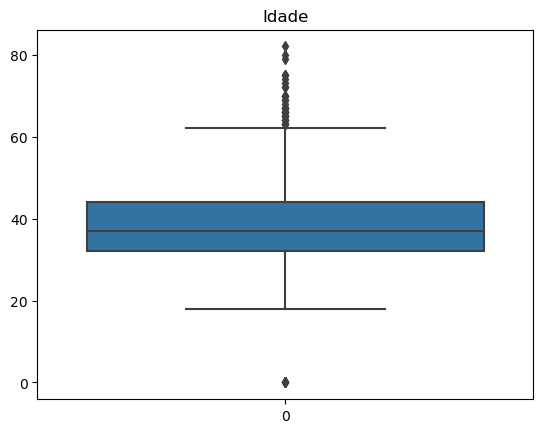

In [42]:
sns.boxplot(df['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

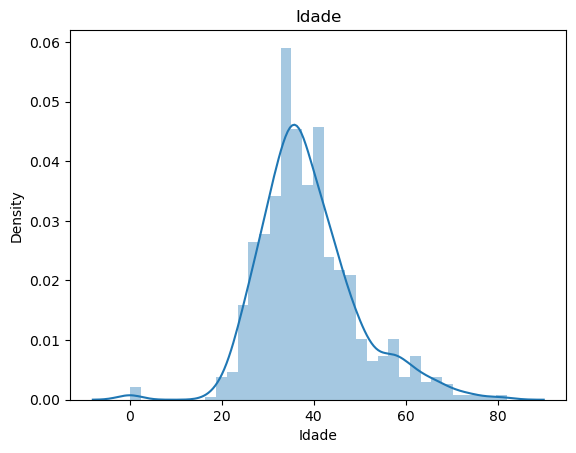

In [43]:
sns.distplot(df['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Saldo')

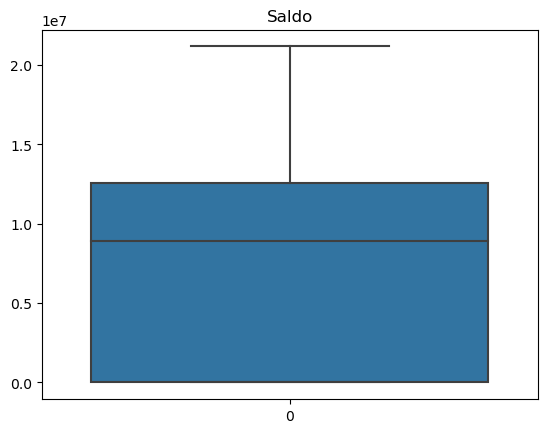

In [44]:
sns.boxplot(df['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

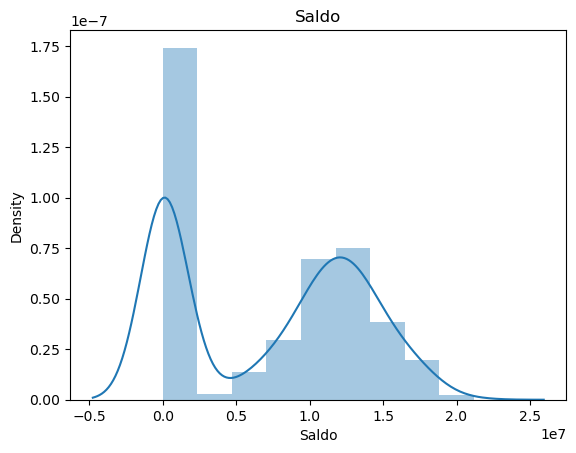

In [45]:
sns.distplot(df['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Salario')

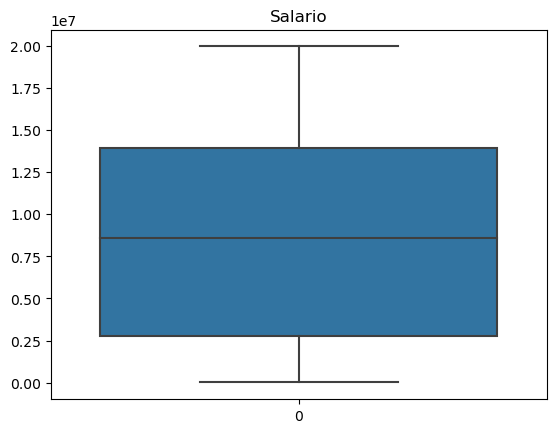

In [46]:
sns.boxplot(df['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

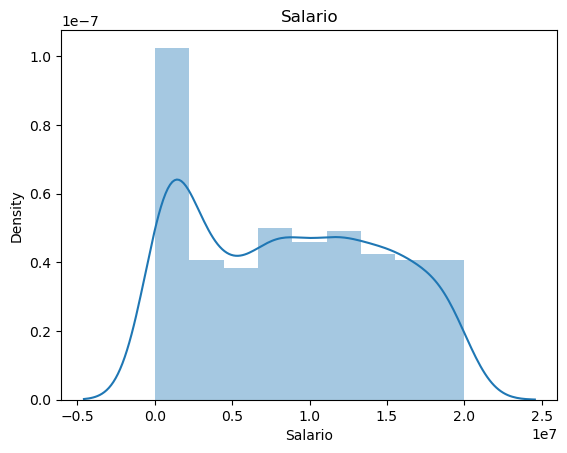

In [47]:
sns.distplot(df['Salario']).set_title('Salario')